In [1]:
!pip install nltk spacy
!python -m spacy download en_core_web_sm



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 127.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"quanttanzeelahmad","key":"ab6078ab606c0cb8f9fee7f858bdeccb"}'}

In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
!unzip imdb-dataset-of-50k-movie-reviews.zip


Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
Archive:  imdb-dataset-of-50k-movie-reviews.zip
  inflating: IMDB Dataset.csv        


In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv("IMDB Dataset.csv")

# Display first 5 rows
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [8]:
import pandas as pd
import nltk

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('punkt_tab')

# Load data
df = pd.read_csv('IMDB Dataset.csv')
df.head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [9]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Remove HTML tags, punctuation, and lowercase
    text = re.sub(r'<.*?>', '', text)            # Remove HTML
    text = re.sub(r'[^a-zA-Z]', ' ', text)       # Remove punctuation/numbers
    text = text.lower()                          # Lowercase
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

df['tokens'] = df['review'].apply(clean_text)
df[['review', 'tokens']].head()


,review,tokens
0,One of the other reviewers has mentioned that ...,"[one, reviewers, mentioned, watching, oz, epis..."
1,A wonderful little production. <br /><br />The...,"[wonderful, little, production, filming, techn..."
2,I thought this was a wonderful way to spend ti...,"[thought, wonderful, way, spend, time, hot, su..."
3,Basically there's a family where a little boy ...,"[basically, family, little, boy, jake, thinks,..."
4,"Petter Mattei's ""Love in the Time of Money"" is...","[petter, mattei, love, time, money, visually, ..."


In [10]:
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    return wordnet.NOUN

def lemmatize_tokens(tokens):
    pos_tags = pos_tag(tokens)
    return [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in pos_tags]

df['lemmatized'] = df['tokens'].apply(lemmatize_tokens)
df[['review', 'lemmatized']].head()


,review,lemmatized
0,One of the other reviewers has mentioned that ...,"[one, reviewer, mention, watch, oz, episode, h..."
1,A wonderful little production. <br /><br />The...,"[wonderful, little, production, film, techniqu..."
2,I thought this was a wonderful way to spend ti...,"[think, wonderful, way, spend, time, hot, summ..."
3,Basically there's a family where a little boy ...,"[basically, family, little, boy, jake, think, ..."
4,"Petter Mattei's ""Love in the Time of Money"" is...","[petter, mattei, love, time, money, visually, ..."


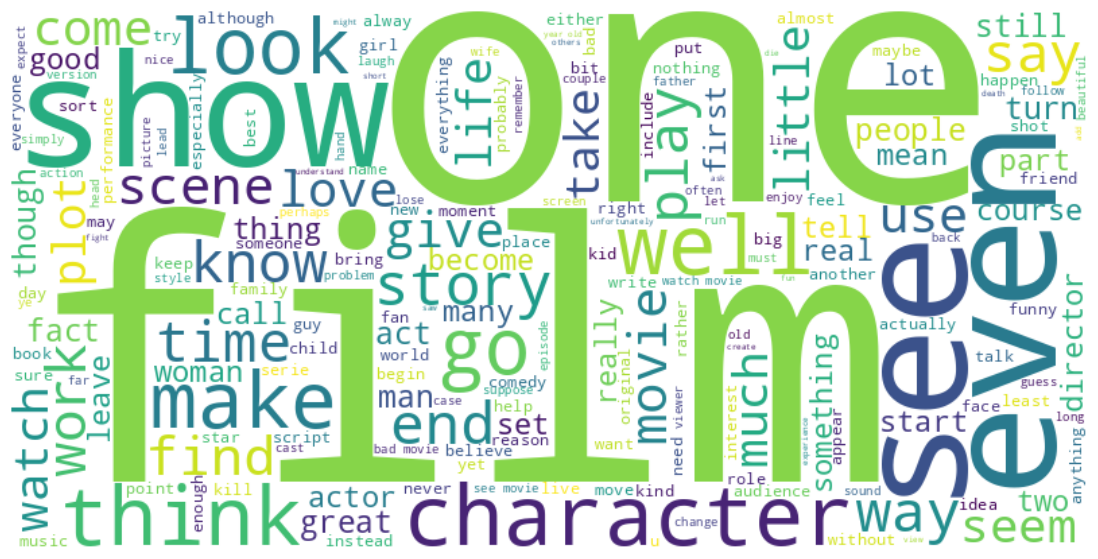

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_words = ' '.join([' '.join(words) for words in df['lemmatized']])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [13]:
# Save selected columns to a new CSV file
df[['review', 'tokens', 'lemmatized']].to_csv('IMDB_Processed.csv', index=False)


In [14]:
from google.colab import files
files.download('IMDB_Processed.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>